# 01/14/21 - Originally started back in June(ish) (didn't list it) ... I worked through all the notebooks to find this to be the most recent and up-to-date. I followed through this notebook to make the most recent selection listed below.

In [1]:
# libraries
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

from astropy import constants as const
from astropy.io import fits
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM, z_at_value

c = const.c.to('km/s').value #c in km/s
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
cosmo = FlatLambdaCDM(h0, Om0=0.262)

In [15]:
# read in catalogs
links = pd.read_csv('/data/sknabel/autoz_modeling/files/csv/links_autoz_sample_latest.csv')
links_knabel = pd.read_csv('/data/sknabel/autoz_modeling/files/csv/links_knabel_autoz_sample_latest.csv')
li = pd.read_csv('/data/sknabel/autoz_modeling/files/csv/li_autoz_sample_latest.csv')
print(len(links), len(links_knabel), len(li))

56 7 8


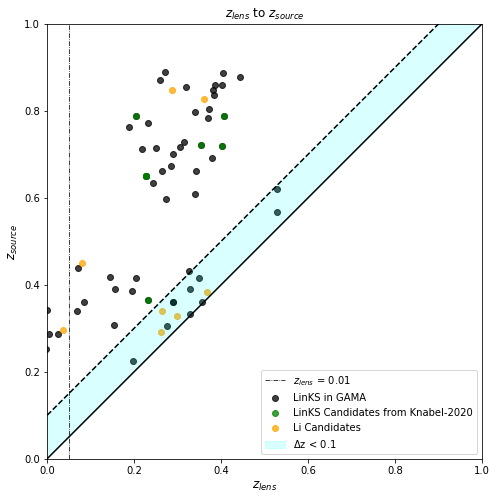

In [23]:
# plots
x = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(8,8))
ax = plt.subplot()
#ax.set_xlim(0, 1)
#ax.set_ylim(0, 0.8)
ax.scatter(links.zlens,
          links.zsource,
          color = 'k',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS in GAMA')
ax.scatter(links_knabel.zlens,
           links_knabel.zsource,
          color = 'g',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS Candidates from Knabel-2020')
ax.scatter(li.zlens,
           li.zsource,
          color = 'orange',
          marker = 'o',
          alpha = 0.75,
          label = 'Li Candidates')
#ax.add_patch(patches.Rectangle((1.85, 4.5), 2, 10, 
 #                              edgecolor = 'k', facecolor = 'none', linestyle = ':',
  #                            label = 'Holwerda-15 Selection'))
#ax.axvline(1.2, color = 'k', linewidth = .75, linestyle = '--', label = 'R = 1.2')
ax.set_xlabel('$z_{lens}$', fontsize = 12)
ax.set_ylabel('$z_{source}$',  fontsize = 12)
ax.set_title('$z_{lens}$ to $z_{source}$')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect(1)
ax.plot(x, x, color = 'k', linestyle = '-')
ax.plot(x, x + 0.1, color = 'k', linestyle = '--')
#ax.plot(x, x - 0.1, color = 'k', linestyle = '--')
plt.fill_between(x, x, x+0.1, # Fill region for false candidates
                 facecolor="cyan", # The fill color
                 color='cyan',       # The outline color
                 alpha=0.15, # Transparency of the fill
                label='$\Delta$z < 0.1') # plots
x = np.linspace(0, 1, 100)


#ax.set_xlim(0, 1)
#ax.set_ylim(0, 0.8)

#ax.add_patch(patches.Rectangle((1.85, 4.5), 2, 10, 
 #                              edgecolor = 'k', facecolor = 'none', linestyle = ':',
  #                            label = 'Holwerda-15 Selection'))
ax.axvline(0.05, color = 'k', linewidth = .75, linestyle = '-.', label = '$z_{lens}$ = 0.01')

plt.legend()
#plt.show()

#plt.savefig('/home/shawn/Desktop/links_autoz/visuals/png/zlens_to_zsource_061520.png')


In [24]:
li_cut_lowz = li[(li.zsource - li.zlens > 0.1) & (li.zlens > 0.05)]
links_cut_lowz = links[(links.zsource - links.zlens > 0.1) & (links.zlens > 0.05)]
links_knabel_cut_lowz = links_knabel[(links_knabel.zsource - links_knabel.zlens > 0.1) & (links_knabel.zlens > 0.05)]

print(len(li), len(links), len(links_knabel))
print(len(li_cut_lowz), len(links_cut_lowz), len(links_knabel_cut_lowz))
print(li.zlens, links.zlens, links_knabel.zlens)
print(li_cut_lowz.zlens, links_cut_lowz.zlens, links_knabel_cut_lowz.zlens)


8 56 7
3 42 7
0    0.286557
1    0.367197
2    0.263391
3    0.035371
4    0.262110
5    0.079985
6    0.359714
7    0.298390
Name: zlens, dtype: float64 0     0.243359
1     0.187679
2     0.217723
3     0.231903
4     0.383991
5     0.204663
6     0.320287
7     0.285867
8     0.259462
9     0.250201
10    0.271764
11    0.288918
12    0.288889
13    0.227044
14    0.227039
15    0.274168
16    0.289451
17    0.401008
18    0.313870
19    0.379751
20    0.401214
21    0.353286
22    0.349805
23    0.355355
24    0.328124
25    0.370643
26    0.232537
27    0.004640
28    0.084084
29    0.069276
30    0.153366
31   -0.000003
32    0.156429
33    0.194628
34    0.385581
35    0.144270
36   -0.002314
37    0.025177
38    0.071459
39    0.406623
40    0.339517
41    0.380684
42    0.444535
43    0.372997
44    0.529104
45    0.529031
46    0.343286
47    0.204727
48    0.274880
49    0.404170
50    0.197416
51    0.325175
52    0.328045
53    0.305116
54    0.339009
55    0.263443
Name: 

In [35]:
links_duplicates = links_cut_lowz[links_cut_lowz.duplicated(subset=['GAMA_ID'], keep=False)]
print(links_duplicates)
# still have 2 duplicates in links
print(links_duplicates.isin(links_knabel_cut_lowz))

    Unnamed: 0   GAMA_ID      ID       RA_x    DEC_x       type  \
13          13  544226.0  3212.0  214.42336 -0.89247   PG + ELG   
14          14  544226.0  3212.0  214.42336 -0.89247   PG + ELG   
33          33  262874.0    26.0  221.61067  2.22389   ELG + PG   
34          34  262874.0    26.0  221.61067  2.22389  ELG + ELG   

    corrected_stellar_mass     zlens  sigma_lens   zsource  ...        z2  \
13            7.340000e+10  0.227044    9.393048  0.649824  ...  0.649824   
14            7.340000e+10  0.227039    6.293928  0.649852  ...  0.227039   
33            3.802535e+10  0.194628    4.816656  0.385518  ...  0.194628   
34            1.016000e+11  0.385581    6.221604  0.858924  ...  0.858924   

      sigma2  template2    sigma3    sigma4      prob      error  score  \
13  7.239896       46.0  3.411552  3.411552  0.996206  45.355965     18   
14  6.293928       40.0  3.835091  3.835091  0.366429  39.200554     18   
33  4.816656       47.0  3.402748  3.402748  0.999962

In [36]:
print(len(li_cut_lowz), len(links_cut_lowz), len(links_knabel_cut_lowz))

3 42 7


### We now have catalogs of 42 LinKS (2 duplicated, 40 unique), 7 from Knabel-2020 (1 duplicated, 6 unique) and 7 Li candidates. ###

In [39]:
# save these as new catalogs in a designated latest directory
path_to_csv = "/data/sknabel/autoz_modeling/files/csv/"
path_to_latest = "/data/sknabel/autoz_modeling/files/csv/latest/"

li_cut_lowz.to_csv(f'{path_to_latest}li_sample_latest_len3.csv')
links_cut_lowz.to_csv(f'{path_to_latest}links_sample_latest_len42.csv')
links_knabel_cut_lowz.to_csv(f'{path_to_latest}links_knabel_sample_latest_len7.csv')

# also save versions to the csv directory
li_cut_lowz.to_csv(f'{path_to_csv}li_sample_011421_len3.csv')
links_cut_lowz.to_csv(f'{path_to_csv}links_sample_011421_len42.csv')
links_knabel_cut_lowz.to_csv(f'{path_to_csv}links_knabel_sample_011421_len7.csv')

In [40]:
links_knabel_cut_lowz

,Unnamed: 0,GAMA_ID,ID,RA_x,DEC_x,type,corrected_stellar_mass,zlens,sigma_lens,zsource,...,z2,sigma2,template2,sigma3,sigma4,prob,error,score,P1,P3
0,0,585328.0,3234.0,182.36838,-0.00889,PG + ELG,1.347000e+11,0.204663,11.430782,0.788741,...,0.788741,3.371675,43.0,2.756129,2.756129,1.000000,39.344978,18,0.837,NaN
1,1,544226.0,3212.0,214.42336,-0.89247,PG + ELG,7.340000e+10,0.227044,9.393048,0.649824,...,0.649824,7.239896,46.0,3.411552,3.411552,0.996206,45.355965,18,0.988,NaN
2,2,544226.0,3212.0,214.42336,-0.89247,PG + ELG,7.340000e+10,0.227039,6.293928,0.649852,...,0.227039,6.293928,40.0,3.835091,3.835091,0.366429,39.200554,18,0.988,NaN
3,3,250289.0,2730.0,214.36708,1.99311,PG + ELG,1.894000e+11,0.401214,8.795989,0.719616,...,0.719616,4.515500,47.0,3.275637,3.275637,0.999952,52.423916,28,0.999,1.000
4,4,323152.0,2967.0,130.54643,1.64325,PG + ELG,3.842881e+11,0.353286,7.519264,0.721590,...,0.353286,7.519264,40.0,4.763242,4.763242,0.989458,29.413359,30,1.000,1.000
5,5,3575500.0,1906.0,129.23265,-1.57512,ELG + PG,1.696965e+11,0.232537,4.330916,0.365195,...,0.232537,4.330916,43.0,3.326265,3.326265,0.999702,57.593048,26,0.929,NaN
6,6,3629152.0,1933.0,135.88864,-0.97487,ELG + ELG,2.129000e+11,0.406623,4.328009,0.787118,...,0.787118,3.691353,40.0,3.029998,3.029998,0.792829,87.774857,26,NaN,0.883
